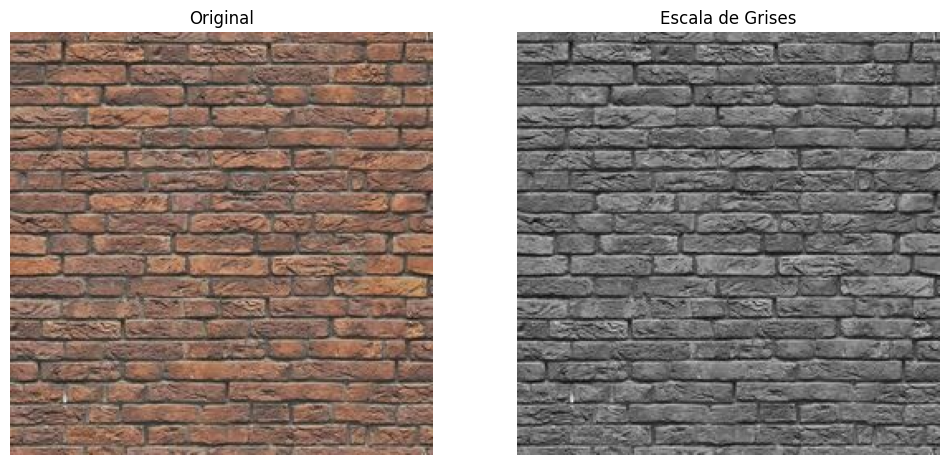

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy.stats import multivariate_normal
%matplotlib inline

# leer la imagen de Baboo original
imagen_original = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/textura.jpg")
# Debemos cumplir con la siguiente formula g(x,y) = f(x,y)h(x,y)+n(x)
# Convertir la imagen de Baboo original a escala de grises. Ésta será nuestra f(x,y)
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')
         
plt.show()

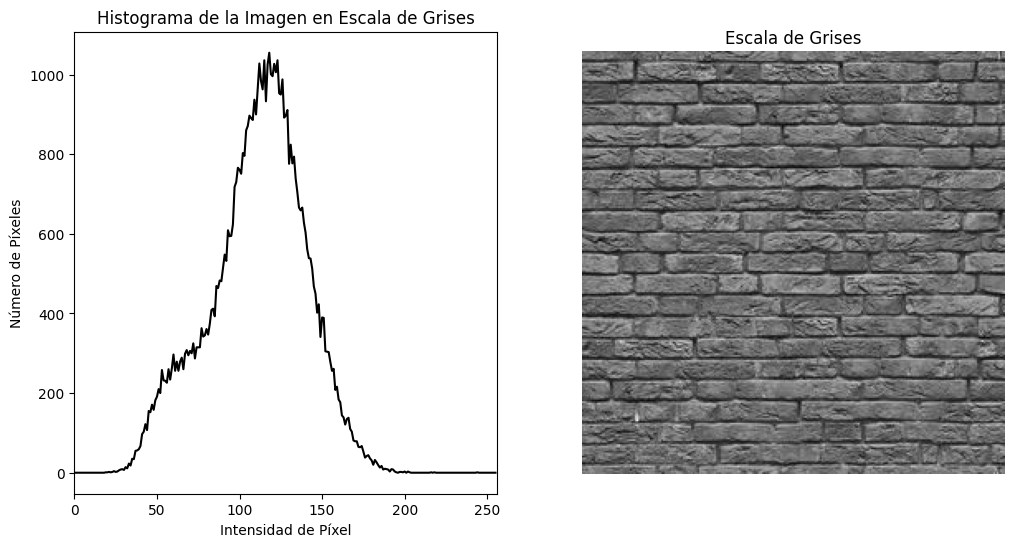

In [2]:
# Calcular el histograma de la imagen en escala de grises
histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma, color='black')
plt.title("Histograma de la Imagen en Escala de Grises")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')

plt.show()

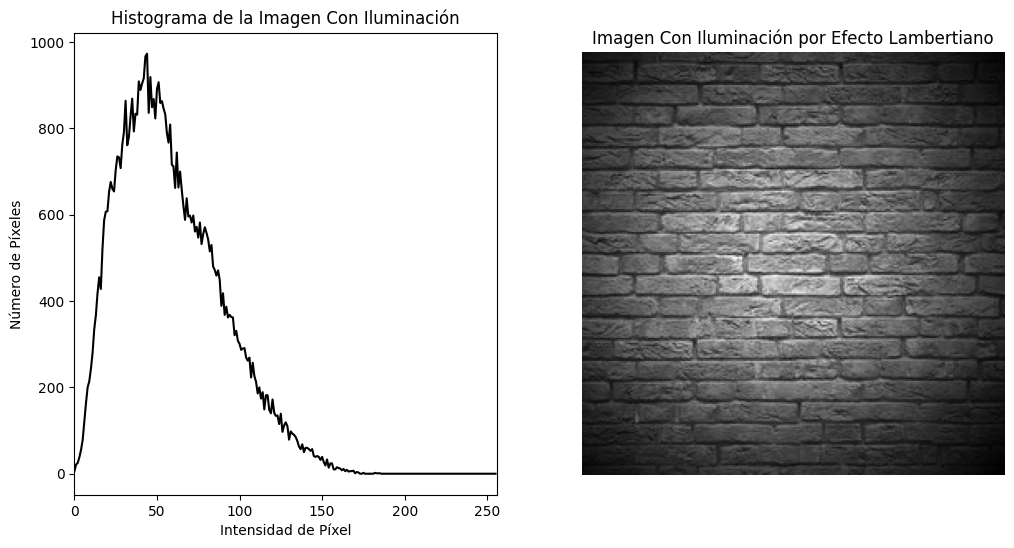

In [3]:
r, c = imagen_gris.shape

# Parámetros para el efecto de iluminación
tau = 5.0
alfa = 245.0
rho = 2.0

# Convertir tau y alfa a radianes
tau = (np.pi * tau) / 180.0
alfa = (np.pi * alfa) / 180.0

# Aplicar el efecto de iluminación
I_effect = np.zeros((r, c))
for i in range(r):
    for j in range(c):
        x0 = (i - r / 2) / (r / 4.0)
        y0 = (j - c / 2) / (c / 4.0)
        R = np.cos(tau) * np.sqrt((rho * np.tan(tau) * np.cos(alfa) - x0) ** 2 + (rho * np.tan(tau) * np.sin(alfa) - y0) ** 2)
        R = np.arctan(rho / R)
        R = np.cos(1.5708 - R)
        I_effect[i, j] = R

# Normalizar el efecto y aplicarlo a la imagen en escala de grises
I_effect_normalized = (I_effect - np.min(I_effect)) / (np.max(I_effect) - np.min(I_effect))
imagen_sombreada = imagen_gris.astype(np.float32) * I_effect_normalized

# Asegurar que la imagen resultante tenga valores válidos de 0 a 255
imagen_sombreada = np.clip(imagen_sombreada, 0, 255).astype(np.uint8)
# Calcular el histograma de la imagen en escala de grises con factor de iluminación
histograma_sombreado = cv2.calcHist([imagen_sombreada], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado, color='black')
plt.title("Histograma de la Imagen Con Iluminación")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(imagen_sombreada, cmap="gray")
plt.title("Imagen Con Iluminación por Efecto Lambertiano")
plt.axis('off')

plt.show()

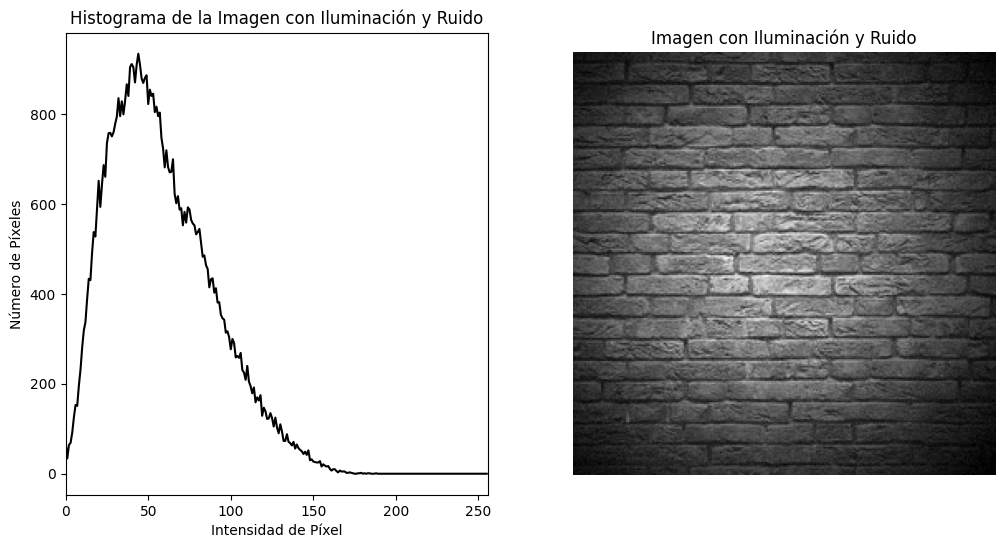

In [4]:
# Efectuamos ahora f(x,y)g(x,y)+n(x,y). f(x,y)g(x,y) se consiguió en el paso anterior. De esta forma tendremos completo nuestra formula g(x,y) = f(x,y)h(x,y)+n(x)
# Denominaremos a g(x,y) con el alias imagen_con_ruido



# Agregamos ruido gaussiano a la imagen generada con gradiente
def anadir_ruido_gaussiano(imagen_sombreada):
    filas, columnas = imagen_sombreada.shape

    # Generar el ruido gaussiano
    media = 0
    varianza = 10
    sigma = varianza ** 0.5

    # Crear una matriz de ruido gaussiano del mismo tamaño que la imagen
    ruido_gaussiano = np.random.normal(media, sigma, (filas, columnas)).reshape(filas, columnas)

    # Añadir el ruido a la imagen original
    imagen_con_ruido = cv2.add(imagen_sombreada.astype(np.float32), ruido_gaussiano.astype(np.float32))

    return imagen_con_ruido

# Se añade ruido a la imagen
imagen_con_ruido = anadir_ruido_gaussiano(imagen_sombreada)

# Convertir la imagen con ruido a un formato válido (uint8) y asegurar que los valores estén en el rango correcto
imagen_con_ruido = np.clip(imagen_con_ruido, 0, 255)

# Calcular el histograma de g(x,y)
histograma_sombreado_ruido = cv2.calcHist([imagen_con_ruido], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado_ruido, color='black')
plt.title("Histograma de la Imagen con Iluminación y Ruido")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen ecualizada en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con Iluminación y Ruido")
plt.axis('off')

plt.show()

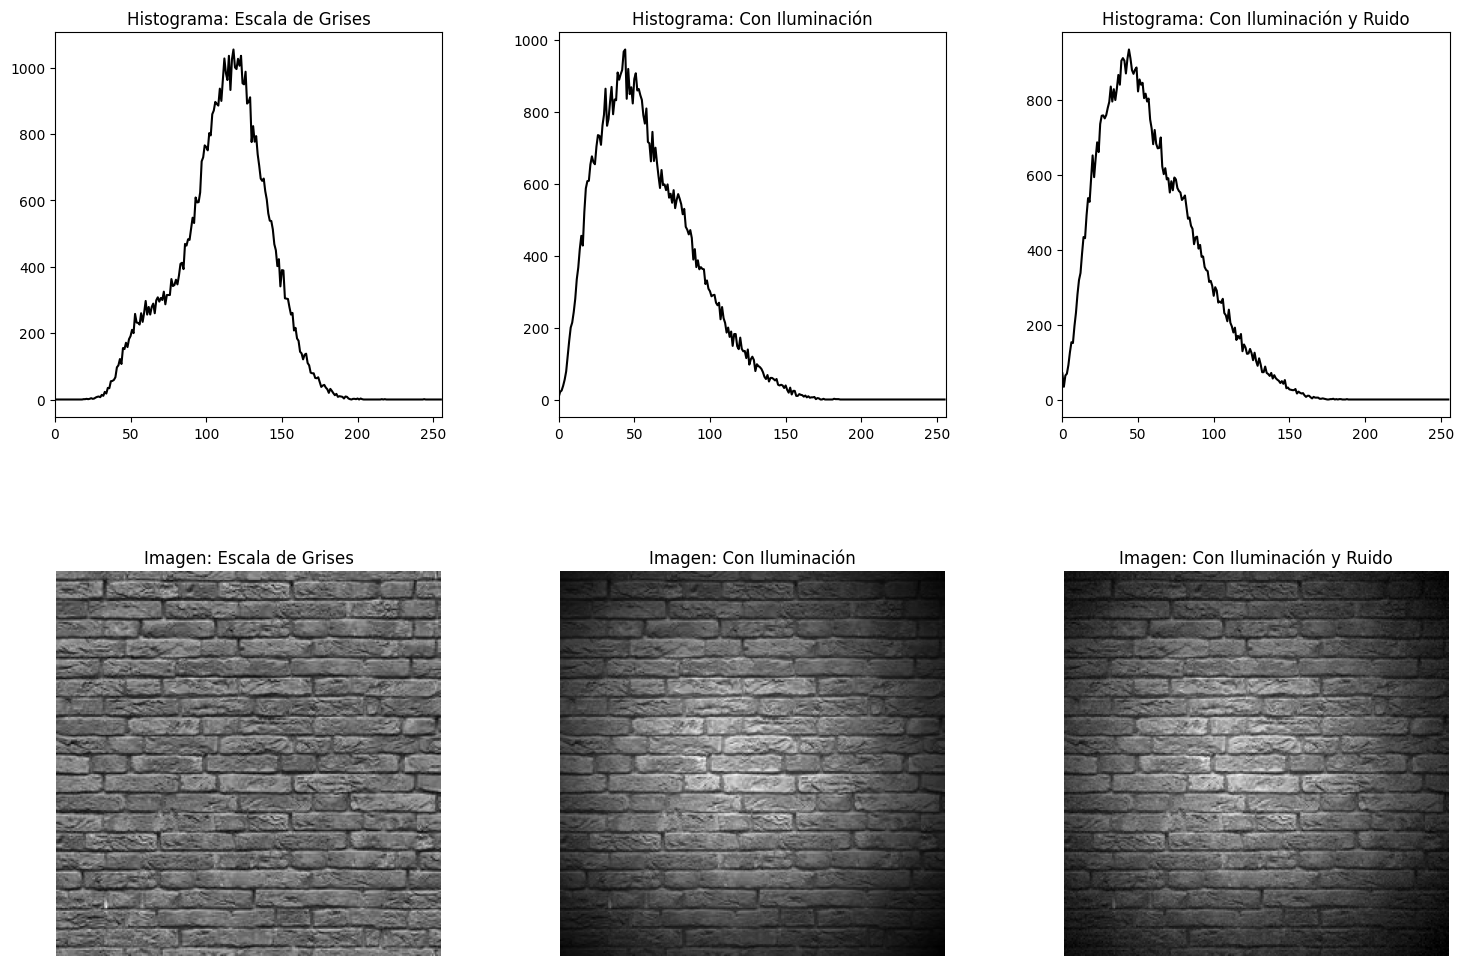

In [5]:
# Configura la figura para tener 2 filas y 3 columnas, ajustando el tamaño total
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Ajustar el espacio entre gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Primer par: Histograma e imagen en escala de grises
axs[0, 0].plot(histograma, color='black')
axs[0, 0].set_title("Histograma: Escala de Grises")
axs[0, 0].set_xlim([0, 256])

axs[1, 0].imshow(imagen_gris, cmap="gray")
axs[1, 0].set_title("Imagen: Escala de Grises")
axs[1, 0].axis('off')

# Segundo par: Histograma e imagen con iluminación
axs[0, 1].plot(histograma_sombreado, color='black')
axs[0, 1].set_title("Histograma: Con Iluminación")
axs[0, 1].set_xlim([0, 256])

axs[1, 1].imshow(imagen_sombreada, cmap="gray")
axs[1, 1].set_title("Imagen: Con Iluminación")
axs[1, 1].axis('off')

# Tercer par: Histograma e imagen con iluminación y ruido
axs[0, 2].plot(histograma_sombreado_ruido, color='black')
axs[0, 2].set_title("Histograma: Con Iluminación y Ruido")
axs[0, 2].set_xlim([0, 256])

axs[1, 2].imshow(imagen_con_ruido, cmap="gray")
axs[1, 2].set_title("Imagen: Con Iluminación y Ruido")
axs[1, 2].axis('off')

plt.show()


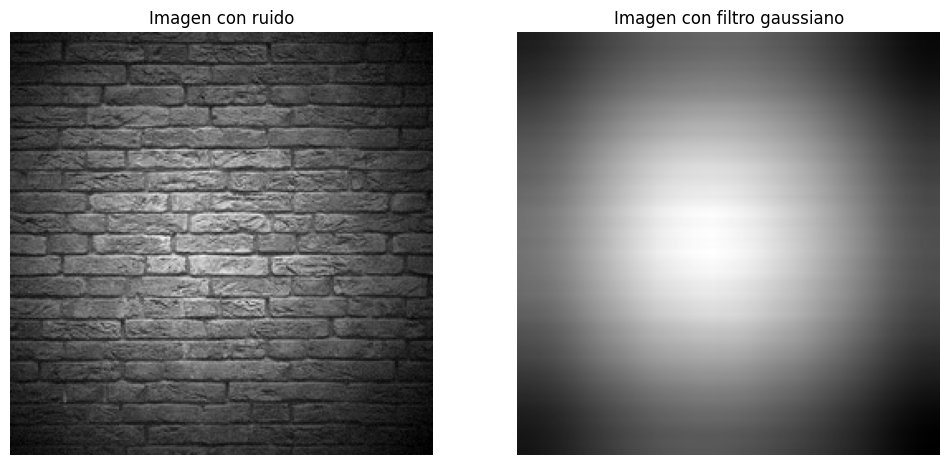

In [6]:
sigma = 250
size = 71

imagen_filtrada = cv2.GaussianBlur(imagen_con_ruido, (size, size), sigma)

# Creamos una figura para contener ambas subtramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con ruido")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_filtrada, cmap="gray")
plt.title("Imagen con filtro gaussiano")
plt.axis('off')


plt.show()

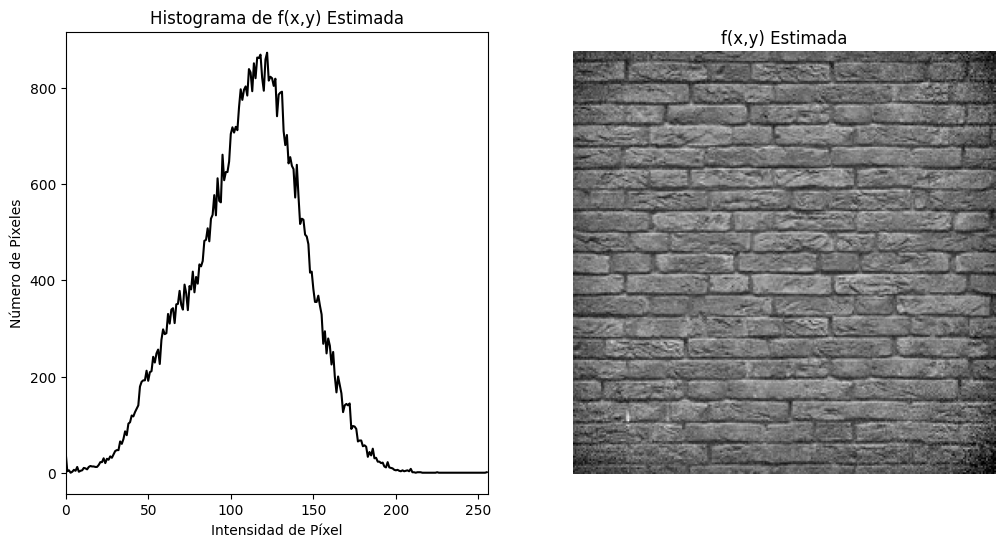

In [8]:
# Una vez que tenemos nuestra h_estimada(x,y) procederemos a obtener nuestra f_estimada(x,y). Para obtener f_estimada(x,y) vamos a realizar una división de nuestra g(x,y)/h_estimada(x,y)



# Se realiza la divisón de g(x,y) entre la h_estimada(x,y) para obtener la f_estimada(x,y)
f_estimada = cv2.divide(imagen_con_ruido,imagen_filtrada).astype(np.float32)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(f_estimada)
f_estimada = cv2.convertScaleAbs(f_estimada, alpha=255.0/(max_val - min_val), beta=-min_val * 255.0/(max_val - min_val))

histograma_f_estimada = cv2.calcHist([f_estimada], [0], None, [256], [0, 256])
#cv2.imwrite("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/FG_Baboon_Lambertiano_fEstimada.jpg", f_estimada)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_f_estimada, color='black')
plt.title("Histograma de f(x,y) Estimada")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(f_estimada, cmap="gray")
plt.title("f(x,y) Estimada")
plt.axis('off')

plt.show()

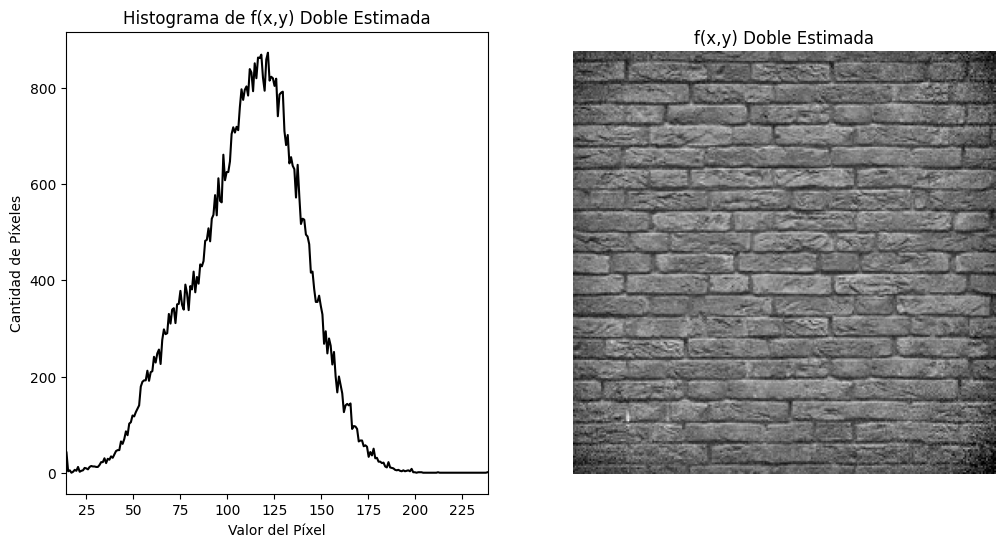

In [15]:
# A continuación realiazremos una normalización de nuestra f_estimada utilizando la media y desviación estandar de nuestra f(x,y)



# Se calcula la media y desviación estandar de g(x,y)
media_observada, desviacionEstandar_observada = cv2.meanStdDev(imagen_gris)

#print(f"Media g(x,y): {media_observada[0][0]}")
#print(f"Desviación estándar g(x,y): {desviacionEstandar_observada[0][0]} \n\n")

# Se calcula la media y desviación estandar de f(x,y) estimada
media_fEstimada, desviacionEstandar_fEstimada = cv2.meanStdDev(f_estimada)

#print(f"Media f(x,y) estimada: {media_pruebaUno[0][0]}")
#print(f"Desviación f(x,y) estimada: {desviacionEstandar_pruebaUno[0][0]}")

f_dobleEstimada = ((f_estimada - media_fEstimada) / desviacionEstandar_fEstimada) * desviacionEstandar_observada + media_observada

#print(f"F doble estimada es {f_dobleEstimada}")

conteos, bordes_bins = np.histogram(f_dobleEstimada.flatten(), bins=256, range=[np.min(f_dobleEstimada), np.max(f_dobleEstimada)])
centros_bins = (bordes_bins[:-1] + bordes_bins[1:]) / 2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(centros_bins, conteos, color='black')
plt.title("Histograma de f(x,y) Doble Estimada")
plt.xlabel("Valor del Píxel")
plt.ylabel("Cantidad de Píxeles")
# Ajusta los límites del eje x para que coincidan con el rango de datos de la imagen flotante
plt.xlim([np.min(f_dobleEstimada), np.max(f_dobleEstimada)])

# Ahora, muestra la imagen f_dobleEstimada en formato float64
plt.subplot(1, 2, 2)
plt.imshow(f_dobleEstimada, cmap='gray', vmin=np.min(f_dobleEstimada), vmax=np.max(f_dobleEstimada))
plt.title("f(x,y) Doble Estimada")
plt.axis('off')

plt.show()

In [10]:
# Aplicamos el RMSE como criterio de comparación

# Se calcula RMSE entre g(x,y) y f_estimada
if f_estimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse1 = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre f_estimada(x,y) y g(x,y) es: {rmse1}")

# Se calcula RMSE entre g(x,y) y f_doble_estimada
if f_dobleEstimada.shape != imagen_gris.shape:
    raise ValueError("Las imágenes deben tener el mismo tamaño")

# Calcular la diferencia entre las imágenes
diferencia = f_dobleEstimada.astype(np.float32) - imagen_gris.astype(np.float32)

# Calcular el cuadrado de las diferencias
cuadrado_diferencias = np.square(diferencia)

# Calcular el promedio de los cuadrados de las diferencias
promedio_cuadrados = np.mean(cuadrado_diferencias)

# Tomar la raíz cuadrada del promedio para obtener el RMSE
rmse2 = np.sqrt(promedio_cuadrados)

print(f"El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: {rmse2}")

El RMSE entre f_estimada(x,y) y g(x,y) es: 14.033600807189941
El RMSE entre f_dobleEstimada(x,y) y g(x,y) es: 14.033600807189941


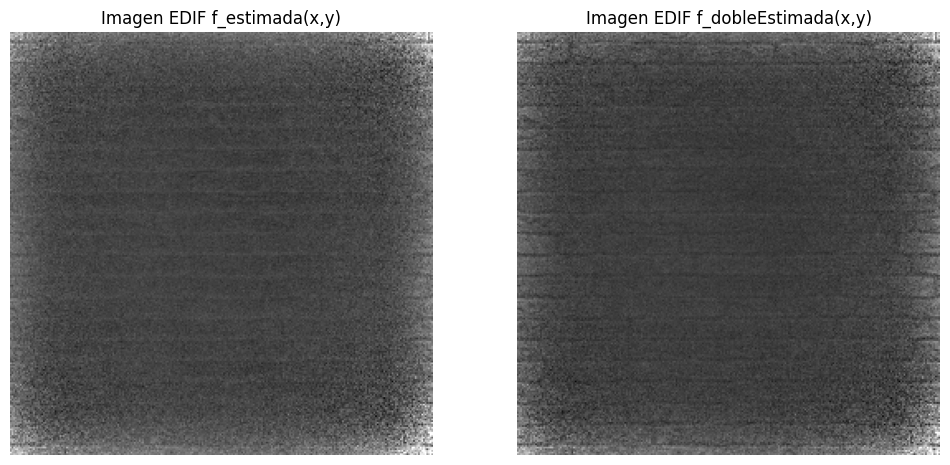

In [11]:
# Aplicamos el EDIF como criterio de comparación

plt.figure(figsize=(12, 6))

# Calcular y mostrar EDIF para f_estimada
diferencia1 = imagen_gris.astype(np.float32) - f_estimada.astype(np.float32)
c1 = 1
c2 = 128
edif1 = c1 * diferencia1 + c2
edif1_visual = np.clip(edif1, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(edif1_visual, cmap='gray')
plt.title('Imagen EDIF f_estimada(x,y)')
plt.axis('off')

# Calcular y mostrar EDIF para f_dobleEstimada
diferencia2 = imagen_gris.astype(np.float32) - f_dobleEstimada.astype(np.float32)
edif2 = c1 * diferencia2 + c2
edif2_visual = np.clip(edif2, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.imshow(edif2_visual, cmap='gray')
plt.title('Imagen EDIF f_dobleEstimada(x,y)')
plt.axis('off')

plt.show()

In [12]:
# Aplicamos el SNR como criterio de comparación



imagen_gris_float = imagen_gris.astype(np.float32)
f_estimada_float = f_estimada.astype(np.float32)
f_dobleEstimada_float = f_dobleEstimada.astype(np.float32)

numerador = np.sum(imagen_gris_float ** 2)
denominador = np.sum((imagen_gris_float - f_estimada_float) ** 2)
denominador2 = np.sum((imagen_gris_float - f_dobleEstimada_float) ** 2)

snr1 = numerador / denominador

print(f"El SNR para f_estimada es: {snr1}")

snr2 = numerador / denominador2

print(f"El SNR para f_dobleEstimada es: {snr2}")

El SNR para f_estimada es: 54.85187911987305
El SNR para f_dobleEstimada es: 66.55339813232422


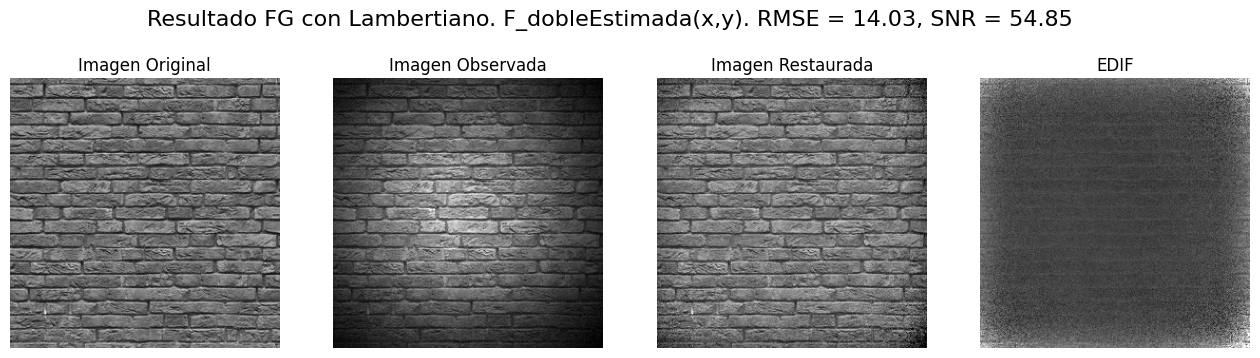

In [14]:
# Comparación de avances

plt.figure(figsize=(16, 8))

plt.suptitle(f"Resultado FG con Lambertiano. F_dobleEstimada(x,y). RMSE = {rmse1:.2f}, SNR = {snr1:.2f}", fontsize=16, y=0.75)

plt.subplot(1, 4, 1)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen Observada")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(f_estimada, cmap="gray")
plt.title("Imagen Restaurada")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edif1_visual, cmap="gray")
plt.title("EDIF")
plt.axis('off')

#plt.savefig("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/Resultados_FG_Lambertiano_Textura.png", dpi=300, bbox_inches='tight')

plt.show()